In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

C:\Users\gabri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Getting the data

In [3]:
region_map = gpd.read_file('../../data/RIO DE JANEIRO MAPS/final_map/final_map2.geojson')

## MatchDay

In [4]:
matchday = gpd.read_file('../../data/trips_reports/adjusted data/matchday(20-4).geojson')

## Days before and after

In [5]:
day_before = pd.read_csv('../../data/trips_reports/raw data/my_report(19-4).csv')

In [6]:
day_after = pd.read_csv('../../data/trips_reports/raw data/my_report(21-4).csv')

In [7]:
day_before = day_before.sort_values(by='origin_id')
day_before.reset_index(inplace=True)
day_before = day_before.drop(columns=['index'], axis=1)

In [8]:
day_after = day_after.sort_values(by='origin_id')
day_after.reset_index(inplace=True)
day_after= day_after.drop(columns=['index'], axis=1)

In [9]:
#Function to normalize the "total_trips" column
#total_trips is str and has some '<10' values
def normalize(df):
    for key, value in df["total_trips"].iteritems():
        if value == '<10':
            df.at[key, 'total_trips'] = '5'
    
    df['total_trips'] = df['total_trips'].astype(float)
    print(df['total_trips'].sum())

In [10]:
normalize(day_before)
normalize(day_after)

556795.94
264669.67000000004


C:\Users\gabri\AppData\Local\Temp\ipykernel_16696\3283907314.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():


In [11]:
#merging match_day with region_map
bef_region = pd.merge(region_map, day_before, how='left', left_on=['ID'], right_on=['origin_id'])
aft_region = pd.merge(region_map, day_after, how='left', left_on=['ID'], right_on=['origin_id'])

In [12]:
#removing stadium as a origin rows
bef_region = bef_region[:183]
aft_region = aft_region[:183]

In [13]:
#removing trips inside stadium area
bef_region.at[182, 'total_trips'] = 0
aft_region.at[182, 'total_trips'] = 0

In [14]:
#filling the NaN spaces 
bef_region.fillna(0, inplace=True)
aft_region.fillna(0, inplace=True)

# Exploring the data

In [15]:
trips_matchday = int(matchday['total_trips'].sum())
trips_daybefore = int(bef_region['total_trips'].sum())
trips_dayafter = int(aft_region['total_trips'].sum())

In [16]:
import statistics
mean_normal_days = statistics.mean([trips_daybefore, trips_dayafter])

In [17]:
print("Trips during the match day: " + str(trips_matchday) + '\n' 
      + "Average trips for the day before and the day after: " + str(mean_normal_days))

Trips during the match day: 252534
Average trips for the day before and the day after: 169780.5


## Plotting

<Figure size 1440x1296 with 0 Axes>

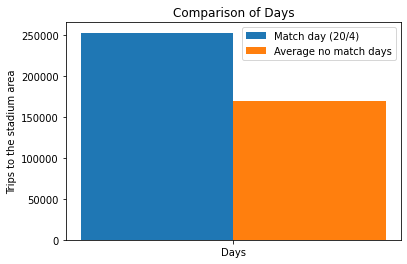

<Figure size 1440x1296 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Data to be plotted
value1 = trips_matchday
value2 = mean_normal_days

# Creating the bar chart
bar_width = 0.4
bar1 = plt.bar(1, value1, bar_width)
bar2 = plt.bar(1 + bar_width, value2, bar_width)

# Adding labels and title
plt.ylabel('Trips to the stadium area')
plt.title('Comparison of Days')
plt.xticks([1 + bar_width/2], ['Days'])

# Adding legend
plt.legend((bar1[0], bar2[0]), ('Match day (20/4)', 'Average no match days'))

# Show the chart
plt.figure(figsize=(20,18))

In [147]:
print("Difference between Average and Match day: " + str(trips_matchday - mean_normal_days))

Difference between Average and Match day: 82753.5
